In [1]:
from __future__ import print_function
import numpy as np 
import time
import plaidml.keras 
plaidml.keras.install_backend()
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [2]:
batch_size = 128
num_classes = 7
epochs = 15

# input image dimensions
img_rows, img_cols = 48, 48

# the data, split between train and test sets

with open("./data/fer2013/fer2013.csv") as f:
    content = f.readlines()
 
    lines = np.array(content)
 
num_of_instances = lines.size
print("number of instances: ",num_of_instances)

x_train, y_train, x_test, y_test = [], [], [], []
 
for i in range(1,num_of_instances):
 try:
  emotion, img, usage = lines[i].split(",")
   
  val = img.split(" ")
  pixels = np.array(val, 'float32')
 
  emotion = keras.utils.np_utils.to_categorical(emotion, 7)
 
  if 'Training' in usage:
   y_train.append(emotion)
   x_train.append(pixels)
  elif 'PublicTest' in usage:
   y_test.append(emotion)
   x_test.append(pixels)
 except:
  print("", end="")
/
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
#y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)

number of instances:  35888
(28709, 2304)
(3589, 2304)
(28709, 1, 7)
(3589, 1, 7)
x_train shape: (28709, 48, 48, 1)
y_train shape: (28709, 1, 7)
28709 train samples
3589 test samples


In [3]:
from numpy.random import seed
seed(1)

In [9]:
Sequential.fit?

In [10]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
y_train = y_train.reshape(len(x_train),7)
y_test = y_test.reshape(len(x_test),7)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
#model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))


model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(output_dim=3072, activation='relu'))
#model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

x_train shape: (28709, 48, 48, 1)
y_train shape: (28709, 1, 7)
x_train shape: (28709, 48, 48, 1)
y_train shape: (28709, 7)


INFO:plaidml:Opening device "amd_radeon_pro_455_compute_engine.0"
/Users/karthik/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3072, activation="relu")`


In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x=x_train,y=y_train,
          batch_size=256,
          epochs=60,
          verbose=1)

Epoch 1/60
28709/28709 [==============================] - 56s - loss: 1.7686 - acc: 0.2758    
Epoch 2/60
28709/28709 [==============================] - 50s - loss: 1.5462 - acc: 0.4007    
Epoch 3/60
28709/28709 [==============================] - 49s - loss: 1.4221 - acc: 0.4497    
Epoch 4/60
28709/28709 [==============================] - 49s - loss: 1.3287 - acc: 0.4897    
Epoch 5/60
28709/28709 [==============================] - 49s - loss: 1.2647 - acc: 0.5185    
Epoch 6/60
28709/28709 [==============================] - 49s - loss: 1.2197 - acc: 0.5349    
Epoch 7/60
28709/28709 [==============================] - 49s - loss: 1.1627 - acc: 0.5560    
Epoch 8/60
28709/28709 [==============================] - 49s - loss: 1.1171 - acc: 0.5764    
Epoch 9/60
28709/28709 [==============================] - 49s - loss: 1.0627 - acc: 0.5998    
Epoch 10/60
28709/28709 [==============================] - 49s - loss: 0.9980 - acc: 0.6237    
Epoch 11/60
28709/28709 [========================

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.77541706907
Test accuracy: 0.578434104216


In [13]:
from keras.preprocessing import image

Populating the interactive namespace from numpy and matplotlib


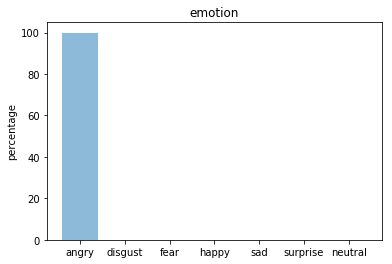

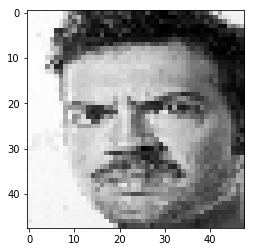

In [33]:
import matplotlib.pyplot as plt
%pylab inline
img = image.load_img("/Users/karthik/Documents/Sc\", grayscale=True, target_size=(48, 48))
 
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
 
x /= 255
 
custom = model.predict(x)
emotion_analysis(custom[0])
 
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
 
plt.gray()
plt.imshow(x)
plt.show()

In [15]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions*100, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

In [18]:
model.save_weights("model_isseu_dp03.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
model_json = model.to_json()
with open("model_isseu_dp_03.json", "w") as json_file:
    json_file.write(model_json)